In [1]:
#imports
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.datasets import make_classification
from sklearn import svm
#from sklearn.svm import SVR
from sklearn import linear_model

# para normalizar
from sklearn import preprocessing

#para features enginering
#from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.cross_validation import train_test_split


import os
os.chdir("C:/Users/Katya/Dropbox/Curso DAyBD/Curso 5/C5 Task 4")

C:\Users\Katya\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#  Lectura de la data
dataFrame = pd.read_csv('Estadisticas CR 2.csv', header=1)
dataFrame.head()

,Delito,SubDelito,Fecha,Hora,Victima,SubVictima,Edad,Genero,Nacionalidad,Provincia,Canton
0,ASALTO,5,01/01/2019,06:00:00 - 08:59:59,PERSONA,1,Mayor de edad,HOMBRE,1,SAN JOSE,31
1,ASALTO,5,06/01/2019,18:00:00 - 20:59:59,PERSONA,4,Mayor de edad,HOMBRE,1,SAN JOSE,1
2,ASALTO,5,07/01/2019,09:00:00 - 11:59:59,PERSONA,1,Mayor de edad,MUJER,2,SAN JOSE,1
3,ASALTO,5,11/01/2019,09:00:00 - 11:59:59,VEHICULO,15,Mayor de edad,HOMBRE,1,ALAJUELA,2
4,ASALTO,5,14/01/2019,18:00:00 - 20:59:59,PERSONA,1,Mayor de edad,HOMBRE,1,SAN JOSE,25


In [3]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71744 entries, 0 to 71743
Data columns (total 11 columns):
Delito          71744 non-null object
SubDelito       71744 non-null int64
Fecha           71744 non-null object
Hora            71744 non-null object
Victima         71744 non-null object
SubVictima      71744 non-null int64
Edad            71744 non-null object
Genero          71744 non-null object
Nacionalidad    71744 non-null int64
Provincia       71744 non-null object
Canton          71744 non-null int64
dtypes: int64(4), object(7)
memory usage: 6.0+ MB


In [4]:
dataFrame["Delito"].unique()

array(['ASALTO', 'HOMICIDIO', 'HURTO', 'ROBO', 'ROBO DE VEHICULO',
       'TACHA DE VEHICULO'], dtype=object)

In [5]:
dataFrame["SubDelito"].unique()

array([ 5, 27,  2,  9, 22, 32, 12, 24, 18, 10, 34, 26, 29, 33, 31, 14,  7,
       21,  6,  1, 23, 25, 30, 11, 20, 13,  3, 16, 15, 28, 17, 19,  8,  4],
      dtype=int64)

In [6]:
dataFrame["Victima"].unique()

array(['PERSONA', 'VEHICULO', 'EDIFICACION', 'VIVIENDA', 'OTROS'],
      dtype=object)

In [7]:
dataFrame["SubVictima"].unique()

array([ 1,  4, 15, 38, 22,  2, 39, 21, 25,  3, 31, 47,  6, 41, 50, 12, 30,
       27,  5, 36, 18, 26,  8, 14, 63, 13, 57, 64, 33, 11, 51, 16, 49, 10,
       17, 20, 45, 23, 44, 19, 54,  9, 35, 48, 40, 37, 56, 34, 42, 52, 28,
       29, 61, 32, 59, 60, 53, 43, 55, 58,  7, 65, 62, 46, 24],
      dtype=int64)

In [8]:
dataFrame["Edad"].unique()

array(['Mayor de edad', 'Desconocido', 'Adulto Mayor', 'Menor de edad'],
      dtype=object)

In [11]:
dataFrame["Nacionalidad"].unique()

array(['COSTA RICA', 'NICARAGUA', 'EL SALVADOR', 'PAISES BAJOS (HOLANDA)',
       'HONDURAS', 'Desconocido', 'ESTADOS UNIDOS', 'MEXICO', 'CHINA',
       'ARGENTINA', 'ESPANA', 'VENEZUELA', 'FILIPINAS', 'FRANCIA',
       'PANAMA', 'CANADA', 'INGLATERRA', 'ALEMANIA', 'COLOMBIA',
       'GUATEMALA', 'DINAMARCA', 'PERU', 'ITALIA', 'SUIZA', 'HAITI',
       'BELGICA', 'CHILE', 'BRASIL', 'DOMINICANA', 'NEPAL', 'INDIA',
       'UCRANIA', 'LIBANO', 'URUGUAY', 'CUBA', 'CHECA', 'ECUADOR',
       'DOMINICA', 'COREA DEL NORTE', 'JAMAICA', 'RUMANIA', 'MICRONESIA',
       'NUEVA ZELANDA', 'ISRAEL', 'AUSTRIA', 'NORUEGA', 'BAHAMAS',
       'FINLANDIA', 'IRLANDA DEL NORTE', 'JAPON', 'AUSTRALIA', 'SUECIA',
       'RUSIA', 'POLONIA', 'HONG KONG', 'TURQUIA', 'BOLIVIA', 'IRLANDA',
       'SIRIA', 'TAIWAN', 'COREA DEL SUR', 'SUDAFRICA', 'SINGAPUR',
       'PORTUGAL', 'BULGARIA', 'MARRUECOS', 'HUNGRIA', 'GRECIA',
       'ESLOVAQUIA', 'ARABIA SAUDITA', 'CROACIA', 'ISLANDIA', 'MALASIA',
       'ESLOVENIA', 'SER

In [48]:
dataFrame["Canton"].unique()

array([31,  1,  2, 25,  7, 39,  5, 40, 58, 10, 33,  9, 43, 12,  3,  6, 26,
       55, 24, 18, 14,  4, 11,  8, 36, 17, 15, 27, 22, 16, 21, 32, 66, 37,
       19, 38, 67, 46, 57, 34, 73, 35, 28, 51, 45, 23, 64, 50, 20, 41, 53,
       13, 65, 52, 48, 44, 56, 62, 49, 47, 54, 42, 60, 29, 63, 30, 69, 70,
       59, 68, 72, 61, 71], dtype=int64)

In [49]:
dataFrame["Hora"].unique()

array(['06:00:00 - 08:59:59', '18:00:00 - 20:59:59',
       '09:00:00 - 11:59:59', '21:00:00 - 23:59:59',
       '00:00:00 - 02:59:59', '03:00:00 - 05:59:59',
       '15:00:00 - 17:59:59', '12:00:00 - 14:59:59'], dtype=object)

In [11]:
# Las diferentes categorías de Victima se pasan a numérico
dataFrame["Victima"]= np.where(dataFrame["Victima"] == "PERSONA", 1, dataFrame["Victima"])
dataFrame["Victima"]= np.where(dataFrame["Victima"] == 'VEHICULO', 2, dataFrame["Victima"])
dataFrame["Victima"]= np.where(dataFrame["Victima"] == 'EDIFICACION', 3, dataFrame["Victima"])
dataFrame["Victima"]= np.where(dataFrame["Victima"] == 'VIVIENDA', 4, dataFrame["Victima"])
dataFrame["Victima"]= np.where(dataFrame["Victima"] == 'OTROS', 5, dataFrame["Victima"])
dataFrame["Victima"].unique()

array([1, 2, 3, 4, 5], dtype=object)

In [12]:
dataFrame["Victima"]= dataFrame["Victima"].astype("int")

In [13]:
# Las diferentes categorías de Delito se pasan a numérico
dataFrame["Delito"]= np.where(dataFrame["Delito"] == "ASALTO", 1, dataFrame["Delito"])
dataFrame["Delito"]= np.where(dataFrame["Delito"] == 'HOMICIDIO', 2, dataFrame["Delito"])
dataFrame["Delito"]= np.where(dataFrame["Delito"] == 'HURTO', 3, dataFrame["Delito"])
dataFrame["Delito"]= np.where(dataFrame["Delito"] == 'ROBO', 4, dataFrame["Delito"])
dataFrame["Delito"]= np.where(dataFrame["Delito"] == 'ROBO DE VEHICULO', 5, dataFrame["Delito"])
dataFrame["Delito"]= np.where(dataFrame["Delito"] == 'TACHA DE VEHICULO', 6, dataFrame["Delito"])
dataFrame["Delito"].unique()

array([1, 2, 3, 4, 5, 6], dtype=object)

In [14]:
dataFrame["Delito"]= dataFrame["Delito"].astype("int")

In [15]:
# Las diferentes categorías de Provincia se pasan a numérico
dataFrame["Provincia"]= np.where(dataFrame["Provincia"] == "SAN JOSE", 1, dataFrame["Provincia"])
dataFrame["Provincia"]= np.where(dataFrame["Provincia"] == 'ALAJUELA', 2, dataFrame["Provincia"])
dataFrame["Provincia"]= np.where(dataFrame["Provincia"] == 'CARTAGO', 3, dataFrame["Provincia"])
dataFrame["Provincia"]= np.where(dataFrame["Provincia"] == 'GUANACASTE', 4, dataFrame["Provincia"])
dataFrame["Provincia"]= np.where(dataFrame["Provincia"] == 'LIMON', 5, dataFrame["Provincia"])
dataFrame["Provincia"]= np.where(dataFrame["Provincia"] == 'PUNTARENAS', 6, dataFrame["Provincia"])
dataFrame["Provincia"]= np.where(dataFrame["Provincia"] == 'HEREDIA', 7, dataFrame["Provincia"])
dataFrame["Provincia"]= np.where(dataFrame["Provincia"] == ' REPUBLICA', 8, dataFrame["Provincia"])
dataFrame["Provincia"]= np.where(dataFrame["Provincia"] == 'DESCONOCIDO', 9, dataFrame["Provincia"])
dataFrame["Provincia"].unique()



array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=object)

In [16]:
dataFrame["Provincia"]= dataFrame["Provincia"].astype("int")

In [10]:
dataFrame['Fecha']= pd.to_datetime(dataFrame['Fecha'], format="%d/%m/%Y")
dataFrame['Fecha'].head()

0   2019-01-01
1   2019-01-06
2   2019-01-07
3   2019-01-11
4   2019-01-14
Name: Fecha, dtype: datetime64[ns]

In [17]:
dataFrame["Canton"]= dataFrame["Canton"].astype("int")

In [23]:
#dataFrame["SubDelito"]= dataFrame["SubDelito"].astype("category")
#dataFrame["SubVictima"]= dataFrame["SubVictima"].astype("category")
#dataFrame["Edad"]= dataFrame["Edad"].astype("category")
#dataFrame["Genero"]= dataFrame["Genero"].astype("category")
#dataFrame["Nacionalidad"]= dataFrame["Nacionalidad"].astype("category")
#dataFrame["Canton"]= dataFrame["Canton"].astype("category")

#dataFrame["Victima"]= dataFrame["Victima"].astype("category")
#dataFrame["Delito"]= dataFrame["Delito"].astype("category")
#dataFrame["Provincia"]= dataFrame["Provincia"].astype("category")

In [18]:
# Las diferentes categorías de Edad se pasan a numérico
dataFrame["Edad"]= np.where(dataFrame["Edad"] == "Mayor de edad", 1, dataFrame["Edad"])
dataFrame["Edad"]= np.where(dataFrame["Edad"] == 'Desconocido', 2, dataFrame["Edad"])
dataFrame["Edad"]= np.where(dataFrame["Edad"] == 'Adulto Mayor', 3, dataFrame["Edad"])
dataFrame["Edad"]= np.where(dataFrame["Edad"] == 'Menor de edad', 4, dataFrame["Edad"])

dataFrame["Edad"]= dataFrame["Edad"].astype("int")
dataFrame["Edad"].unique() 

array([1, 2, 3, 4], dtype=int64)

In [19]:
dataFrame["Genero"]= np.where(dataFrame["Genero"] == "HOMBRE", 1, dataFrame["Genero"])
dataFrame["Genero"]= np.where(dataFrame["Genero"] == 'MUJER', 2, dataFrame["Genero"])
dataFrame["Genero"]= np.where(dataFrame["Genero"] == 'DESCONOCIDO', 3, dataFrame["Genero"])
dataFrame["Genero"]= dataFrame["Genero"].astype("int")
dataFrame["Genero"].unique() 

array([1, 2, 3], dtype=int64)

In [14]:
dataFrame.head()

,Delito,SubDelito,Fecha,Hora,Victima,SubVictima,Edad,Genero,Nacionalidad,Provincia,Canton
0,1,5,2019-01-01,06:00:00 - 08:59:59,1,1,1,1,1,1,31
1,1,5,2019-01-06,18:00:00 - 20:59:59,1,4,1,1,1,1,1
2,1,5,2019-01-07,09:00:00 - 11:59:59,1,1,1,2,2,1,1
3,1,5,2019-01-11,09:00:00 - 11:59:59,2,15,1,1,1,2,2
4,1,5,2019-01-14,18:00:00 - 20:59:59,1,1,1,1,1,1,25


In [15]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71744 entries, 0 to 71743
Data columns (total 11 columns):
Delito          71744 non-null int32
SubDelito       71744 non-null int64
Fecha           71744 non-null datetime64[ns]
Hora            71744 non-null object
Victima         71744 non-null int32
SubVictima      71744 non-null int64
Edad            71744 non-null int32
Genero          71744 non-null int32
Nacionalidad    71744 non-null int64
Provincia       71744 non-null int32
Canton          71744 non-null int32
dtypes: datetime64[ns](1), int32(6), int64(3), object(1)
memory usage: 4.4+ MB


In [23]:
dataFrame.describe()

,Delito,SubDelito,Victima,SubVictima,Edad,Genero,Nacionalidad,Provincia,Canton
count,71744.000000,71744.000000,71744.000000,71744.000000,71744.000000,71744.000000,71744.000000,71744.000000,71744.000000
mean,2.976500,6.898389,2.228423,8.759813,1.274922,1.430977,1.893385,3.068103,18.280734
std,1.569054,6.467751,1.262461,12.122934,0.714792,0.560418,3.337448,2.163183,18.623012
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000
50%,3.000000,4.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,12.000000
75%,4.000000,10.000000,3.000000,10.000000,1.000000,2.000000,1.000000,5.000000,29.000000
max,6.000000,34.000000,5.000000,65.000000,4.000000,3.000000,26.000000,9.000000,73.000000


## Visualización de datos

En esta sección se presentan gráficos de las diferentes variables

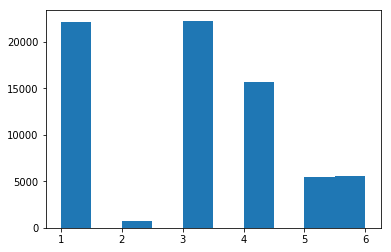

In [43]:
# se grafica Delito
plt.hist(dataFrame["Delito"])
plt.show()

[Text(0,0,'HURTO'),
 Text(0,0,'ASALTO'),
 Text(0,0,'ROBO'),
 Text(0,0,'TACHA VEHICULO'),
 Text(0,0,'ROBO VEHICULO'),
 Text(0,0,'HOMICIDIO')]

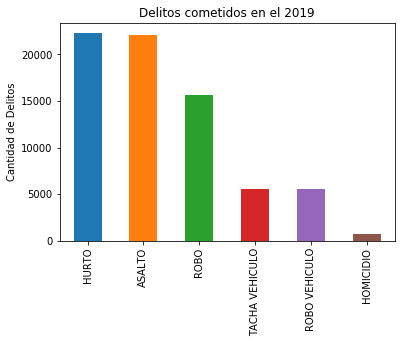

In [42]:
Educ_plot = dataFrame["Delito"].value_counts()
Educ_plot = Educ_plot.plot(kind='bar')

Educ_plot.set_ylabel('Cantidad de Delitos')
Educ_plot.set_title('Delitos cometidos en el 2019')
#Educ_plot.set_xticks(10)
Educ_plot.set_xticklabels( ('HURTO', 'ASALTO','ROBO','TACHA VEHICULO','ROBO VEHICULO','HOMICIDIO') )

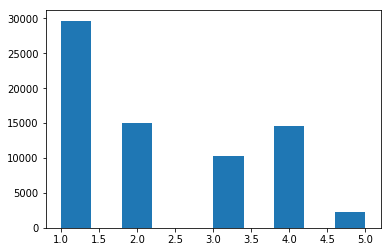

In [45]:
# se grafica Victima
plt.hist(dataFrame["Victima"])
plt.show()

[Text(0,0,'Persona'),
 Text(0,0,'Vehículo'),
 Text(0,0,'Vivienda'),
 Text(0,0,'Edificación'),
 Text(0,0,'Otros')]

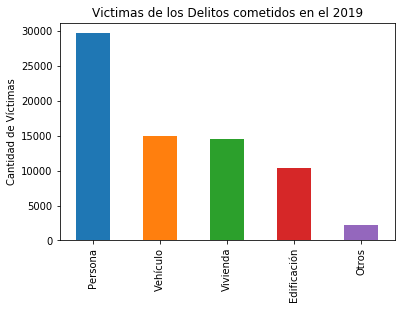

In [51]:
Educ_plot = dataFrame["Victima"].value_counts()
Educ_plot = Educ_plot.plot(kind='bar')

Educ_plot.set_ylabel('Cantidad de Víctimas')
Educ_plot.set_title('Victimas de los Delitos cometidos en el 2019')
Educ_plot.set_xticklabels( ('Persona', 'Vehículo','Vivienda','Edificación','Otros') )

In [ ]:
# se grafica Provincia
plt.hist(dataFrame["Provincia"])
plt.show()

[Text(0,0,'San José'),
 Text(0,0,'Alajuela'),
 Text(0,0,'Puntarenas'),
 Text(0,0,'Limón'),
 Text(0,0,'Heredia'),
 Text(0,0,'Guanacaste'),
 Text(0,0,'Cartago'),
 Text(0,0,'Republica'),
 Text(0,0,'Desconocido')]

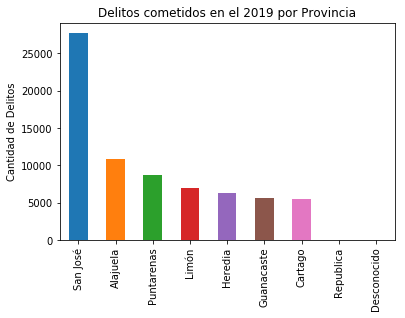

In [53]:
Educ_plot = dataFrame["Provincia"].value_counts()
Educ_plot = Educ_plot.plot(kind='bar')

Educ_plot.set_ylabel('Cantidad de Delitos')
Educ_plot.set_title('Delitos cometidos en el 2019 por Provincia')
Educ_plot.set_xticklabels( ('San José', 'Alajuela','Puntarenas','Limón','Heredia','Guanacaste','Cartago','Republica','Desconocido') )

Text(0.5,1,'Delitos cometidos por fraja horaria')

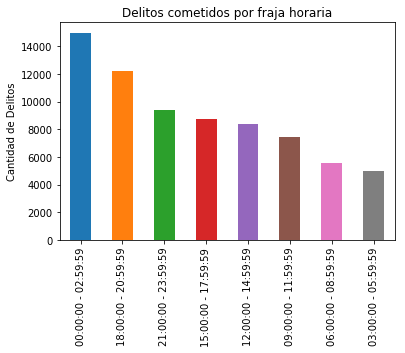

In [50]:
Educ_plot = dataFrame["Hora"].value_counts()
Educ_plot = Educ_plot.plot(kind='bar')

Educ_plot.set_ylabel('Cantidad de Delitos')
Educ_plot.set_title('Delitos cometidos por fraja horaria')
#Educ_plot.set_xticks(10)
#Educ_plot.set_xticklabels( ('HURTO', 'ASALTO','ROBO','TACHA VEHICULO','ROBO VEHICULO','HOMICIDIO') )

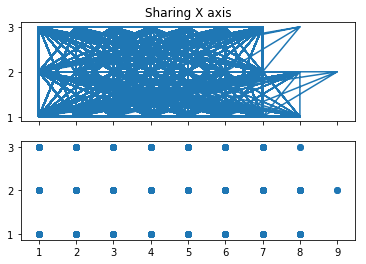

In [61]:

x = dataFrame["Provincia"]
y = dataFrame["Genero"]

# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(x, y)
axarr[0].set_title('Sharing X axis')
axarr[1].scatter(x, y)

In [38]:
import datetime
fecha_1 = datetime.datetime(2019, 12, 1)
#fecha_1 = datetime.datetime.date(fecha_1)
fecha_2 = datetime.datetime(2019, 12, 31)
#fecha_2 = datetime.datetime.date(fecha_2)
print(fecha_1)
print(fecha_2)
mask = (dataFrame['Fecha'] > fecha_1) & (dataFrame['Fecha'] <= fecha_2)
fDic = dataFrame.loc[mask]    #dataFrame.loc[fecha_1:fecha_2 , ]
fDic.head()

2019-12-01 00:00:00
2019-12-31 00:00:00


,Delito,SubDelito,Fecha,Hora,Victima,SubVictima,Edad,Genero,Nacionalidad,Provincia,Canton
1094,1,5,2019-12-02,09:00:00 - 11:59:59,1,1,1,1,1,1,1
1097,1,5,2019-12-05,00:00:00 - 02:59:59,4,2,4,2,1,6,29
1098,1,5,2019-12-02,21:00:00 - 23:59:59,1,1,1,1,1,4,12
1099,1,5,2019-12-05,21:00:00 - 23:59:59,2,15,1,1,1,1,1
1100,1,5,2019-12-04,00:00:00 - 02:59:59,1,1,1,1,1,7,49


In [41]:
print("Cantidad de delitos en Diciembre: ", fDic.count())

Cantidad de delitos en Diciembre:  Delito          4634
SubDelito       4634
Fecha           4634
Hora            4634
Victima         4634
SubVictima      4634
Edad            4634
Genero          4634
Nacionalidad    4634
Provincia       4634
Canton          4634
dtype: int64


In [42]:
fDic.describe()

,Delito,SubDelito,Victima,SubVictima,Edad,Genero,Nacionalidad,Provincia,Canton
count,4634.000000,4634.000000,4634.000000,4634.000000,4634.000000,4634.000000,4634.000000,4634.000000,4634.000000
mean,2.975615,6.875701,2.178032,8.577902,1.242123,1.429003,1.991584,3.136167,18.012085
std,1.511610,6.538673,1.256464,12.017797,0.658724,0.572245,3.686585,2.184214,18.467274
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000
50%,3.000000,5.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,12.000000
75%,4.000000,10.000000,3.000000,10.000000,1.000000,2.000000,1.000000,5.000000,28.750000
max,6.000000,34.000000,5.000000,65.000000,4.000000,3.000000,26.000000,9.000000,73.000000


In [10]:
#dti = pd.date_range(dataFrame['Fecha'], periods=2, freq='M')

### Análsis con base en Series de tiempo

Se crea un nuevo data set para usar las fechas para analizar con base en ellas.  Se decide dejar delito y fecha.

In [2]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from math import sqrt
from matplotlib.pylab import rcParams

In [58]:
#  Lectura de la data
df = pd.read_csv('Estadisticas CR 2.csv', header=1)
df.head()

,Fecha,Hora,Delito,SubDelito,Victima,SubVictima,Edad,Genero,Nacionalidad,Provincia,Canton
0,01/01/2019,06:00:00 - 08:59:59,ASALTO,5,PERSONA,1,Mayor de edad,HOMBRE,1,SAN JOSE,31
1,06/01/2019,18:00:00 - 20:59:59,ASALTO,5,PERSONA,4,Mayor de edad,HOMBRE,1,SAN JOSE,1
2,07/01/2019,09:00:00 - 11:59:59,ASALTO,5,PERSONA,1,Mayor de edad,MUJER,2,SAN JOSE,1
3,11/01/2019,09:00:00 - 11:59:59,ASALTO,5,VEHICULO,15,Mayor de edad,HOMBRE,1,ALAJUELA,2
4,14/01/2019,18:00:00 - 20:59:59,ASALTO,5,PERSONA,1,Mayor de edad,HOMBRE,1,SAN JOSE,25


In [59]:
df['Fecha']= pd.to_datetime(df['Fecha'], format="%d/%m/%Y")

In [60]:
# ordeno los registros por fecha
df=df.sort_values(by=['Fecha'])

In [61]:
# Las diferentes categorías de Delito se pasan a numérico
df["Delito"]= np.where(df["Delito"] == "ASALTO", 1, df["Delito"])
df["Delito"]= np.where(df["Delito"] == 'HOMICIDIO', 2, df["Delito"])
df["Delito"]= np.where(df["Delito"] == 'HURTO', 3, df["Delito"])
df["Delito"]= np.where(df["Delito"] == 'ROBO', 4, df["Delito"])
df["Delito"]= np.where(df["Delito"] == 'ROBO DE VEHICULO', 5, df["Delito"])
df["Delito"]= np.where(df["Delito"] == 'TACHA DE VEHICULO', 6, df["Delito"])
df["Delito"].unique()

array([1, 4, 3, 5, 6, 2], dtype=object)

In [62]:
df=df.drop("SubDelito", axis=1)
df=df.drop("Hora", axis=1)
df=df.drop("Canton", axis=1)
df=df.drop("Provincia", axis=1)
df=df.drop("Nacionalidad", axis=1)
df=df.drop("Genero", axis=1)
df=df.drop("Edad", axis=1)
df=df.drop("Victima", axis=1)
df=df.drop("SubVictima", axis=1)

In [63]:
df.head()

,Fecha,Delito
0,2019-01-01,1
45429,2019-01-01,4
45538,2019-01-01,4
62410,2019-01-01,3
16240,2019-01-01,1


In [64]:
train = df.iloc[ :50220, ]
test = df.iloc[50220:, ]
train.head()

,Fecha,Delito
0,2019-01-01,1
45429,2019-01-01,4
45538,2019-01-01,4
62410,2019-01-01,3
16240,2019-01-01,1


In [65]:
test.head()

,Fecha,Delito
13639,2019-11-03,1
47418,2019-11-03,4
2111,2019-11-03,1
16784,2019-11-03,1
11619,2019-11-03,1


In [77]:
train=train.set_index(['Fecha'])

In [96]:
train.tail()

,Delito
Fecha,
2019-11-03,1
2019-11-03,3
2019-11-03,1
2019-11-03,1
2019-11-03,1


In [79]:
test=test.set_index(['Fecha'])

In [80]:
test.head()

,Delito
Fecha,
2019-11-03,1
2019-11-03,4
2019-11-03,1
2019-11-03,1
2019-11-03,1


In [81]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21524 entries, 2019-11-03 to 2020-03-23
Data columns (total 1 columns):
Delito    21524 non-null object
dtypes: object(1)
memory usage: 336.3+ KB


In [67]:
rcParams['figure.figsize'] = 15, 7

In [82]:
from statsmodels.tsa.holtwinters import Holt

y_hat_avg = test.copy()
fit1 = Holt(np.asarray(train['Delito'])).fit()

In [85]:
y_hat_avg['Holt_Winter'] = fit1.predict(start=1,end=21524)

In [113]:
y_hat_avg.head()

,Delito,Holt_Winter
Fecha,,
2019-11-03,1,3.064204
2019-11-03,4,3.064670
2019-11-03,1,3.065135
2019-11-03,1,3.065103
2019-11-03,1,3.064075


In [119]:
train1=train['2019-10-22':'2019-11-03']

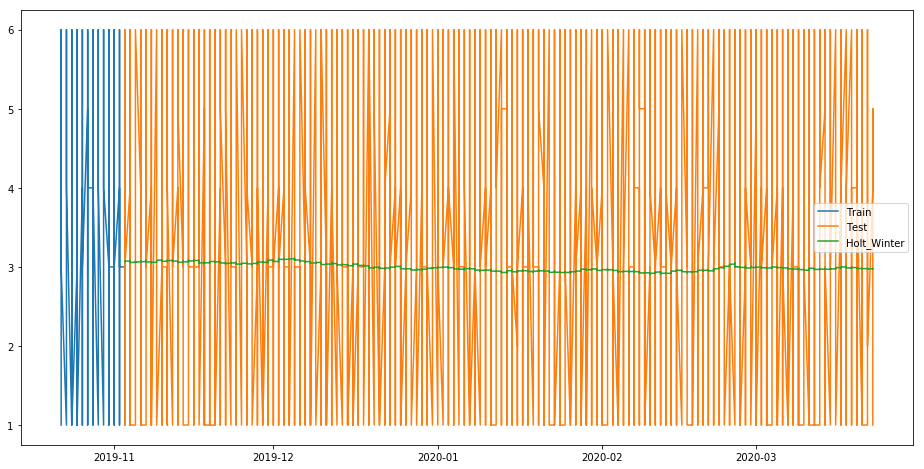

In [121]:
plt.figure(figsize=(16,8))
plt.plot(train1.index, train1['Delito'], label='Train')
plt.plot(test.index,test['Delito'], label='Test')
plt.plot(y_hat_avg.index,y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.savefig('Holt_Winters2.jpg')